In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

%matplotlib inline

In [176]:
n = 50

x = st.norm.rvs(0, 1, n)
y = st.norm.rvs(0, 1, n)
z = st.norm.rvs(0, 1, n)
s = st.norm.rvs(10, 5, n)

#### Scatter plot

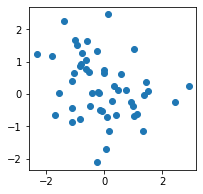

In [177]:
plt.figure(figsize=(3,3))
plt.plot(x,y,'o')

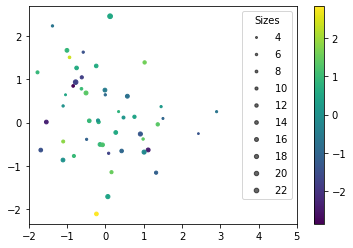

In [184]:
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=s)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

ax.set_xlim(-2, 5)
fig.colorbar(scatter)

#### Line plot

In [113]:
t = np.sin(0.1*x + 2)
err = 0.01*t

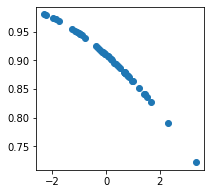

In [114]:
plt.figure(figsize=(3,3))
plt.plot(x,t,'o')

<ErrorbarContainer object of 3 artists>

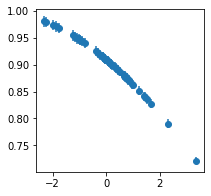

In [115]:
plt.figure(figsize=(3,3))
plt.errorbar(x, t, yerr=err, xerr=err, fmt='o')

#### Figure/axis properties

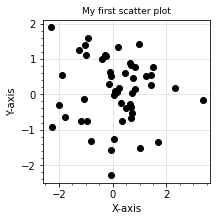

In [116]:
plt.figure(figsize=(3,3))
plt.plot(x, y, 'o', color='k')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("My first scatter plot", fontsize=9)
plt.minorticks_on()
plt.grid(alpha=0.4)

#### Legend

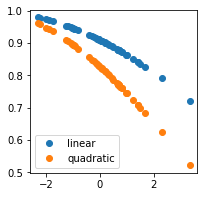

In [117]:
plt.figure(figsize=(3,3))
plt.plot(x, t,'o', label='linear')
plt.plot(x, t**2,'o', label='quadratic')
plt.legend()

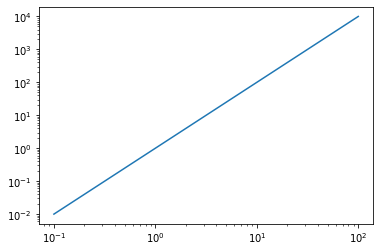

In [118]:
#### Log plot
t = np.linspace(0.1,100)
tsqr = t**2

#plt.plot(t, np.log10(tsqr))
#plt.semilogy(t, tsqr)
plt.loglog(t, tsqr)

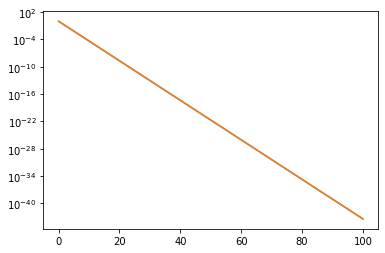

In [119]:
x = np.linspace(0,100,100)
y = np.exp(-x)
plt.plot(x,y)
plt.semilogy(x,y)

#### Histogram

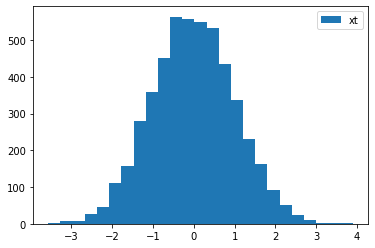

In [136]:
xt = st.norm.rvs(0, 1, 5000)

plt.figure(num=1)
plt.hist(xt, bins=25, lw=2, label='xt');
plt.legend()

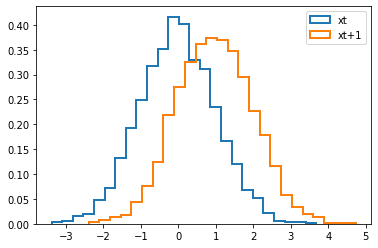

In [120]:
xt = st.norm.rvs(0, 1, 5000)
yt = st.norm.rvs(1, 1, 5000)

plt.figure(num=1)
plt.hist(xt, bins=25, density=True, histtype='step', lw=2, label='xt');
plt.hist(yt, bins=25, density=True, histtype='step', lw=2, label='xt+1');
#plt.hist(yt, bins=np.linspace(-4,6,10), density=True, histtype='step', 
#         lw=2, label='fixed bin');
plt.legend()

#### Subplots


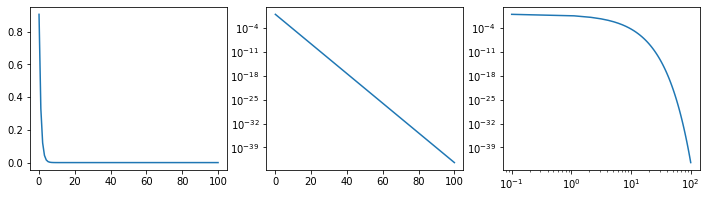

In [121]:
x = np.linspace(0.1,100,100)
y = np.exp(-x)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
ax[0].plot(x,y)
ax[1].semilogy(x,y)
ax[2].loglog(x,y)

In [123]:
df = pd.read_csv('/Users/pluto/Downloads/data.csv')
#dataframe

In [124]:
df

,RA,DEC,F100,F60,R,Td
0,281.14198,-35.79535,34.932,10.722,0.306939,25.701203
1,281.13547,-35.77377,40.672,13.001,0.319655,25.983575
2,281.13140,-35.74818,42.561,15.004,0.352529,26.690765
3,281.12144,-35.72621,37.035,13.246,0.357662,26.798456
4,281.11548,-35.82183,33.415,10.162,0.304115,25.637754
...,...,...,...,...,...,...
437,280.41211,-35.44474,34.635,11.810,0.340985,26.445944
438,280.40338,-35.41912,34.178,11.566,0.338405,26.390733
439,280.39760,-35.39431,33.683,11.510,0.341715,26.461552
440,280.39181,-35.37349,33.421,11.130,0.333024,26.274962


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RA      442 non-null    float64
 1   DEC     442 non-null    float64
 2   F100    442 non-null    float64
 3   F60     442 non-null    float64
 4   R       442 non-null    float64
 5   Td      442 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


In [126]:
df.describe()

,RA,DEC,F100,F60,R,Td
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,280.753969,-35.692062,61.248943,28.343092,0.415519,27.874362
std,0.173371,0.170261,34.368468,27.759758,0.113447,2.032107
min,280.391810,-36.029990,33.244000,9.670600,0.284844,25.197230
25%,280.623803,-35.830083,39.556750,14.303250,0.351651,26.672268
50%,280.754365,-35.698715,49.975500,20.559500,0.392927,27.520882
75%,280.889772,-35.546692,68.094250,28.490750,0.437856,28.402419
max,281.141980,-35.373490,226.510000,201.070000,1.228437,40.879150


In [129]:
ra = df['RA']
dec = df['DEC']
f60 = df['F60']

(281.2, 280.4)

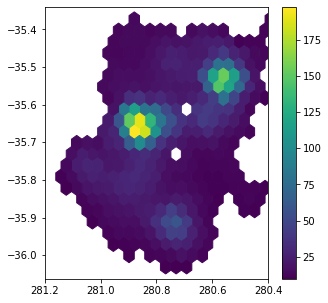

In [134]:
#hexbin
plt.figure(figsize=(5,5))
plt.hexbin(ra, dec, f60, gridsize=(20))
plt.colorbar()
plt.xlim(281.2, 280.4)

(281.2, 280.4)

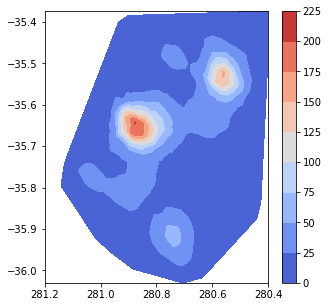

In [149]:
#cmap: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    
plt.figure(figsize=(5,5))
plt.tricontourf(ra, dec, f60, levels=8, cmap='coolwarm')
plt.colorbar()
#plt.clabel(r'F60($\mu$m)')
plt.xlim(281.2, 280.4)

#### 3d plot

In [151]:
from mpl_toolkits.mplot3d import axes3d

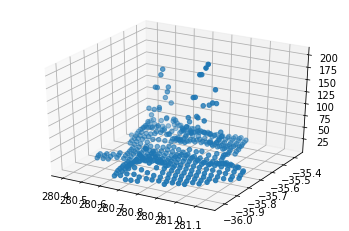

In [152]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ra, dec, f60)

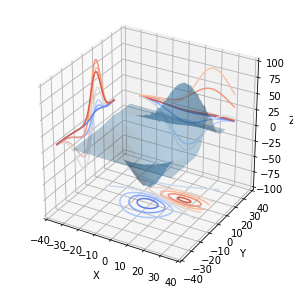

In [156]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
X, Y, Z =axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


##### Projection map 

In [ ]:
#https://matplotlib.org/basemap/users/geography.html

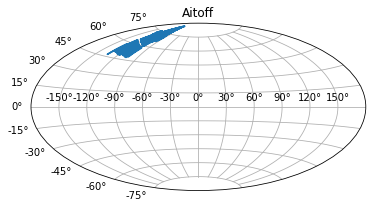

In [157]:
plt.figure()
plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.plot(ra, dec)
plt.grid(True)

##### Simulation

In [ ]:
from IPython.display import clear_output

In [168]:
x = np.linspace(-2*np.pi, 2*np.pi,100)
y = np.sin(x)

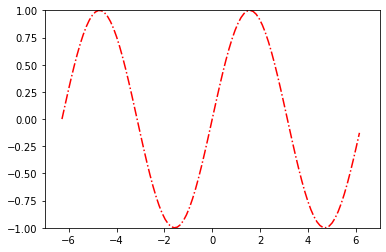

In [174]:
plt.figure(figsize=(5,5))
for i, ix in enumerate(x):
    clear_output()
    plt.xlim(-7,7)
    plt.ylim(-1,1)
    plt.plot(x[:i], y[:i], 'r-.')
    plt.show()
    plt.pause(0.2)